In [1]:
import numpy as np

In [6]:
resultsNF1 = np.load("save_NF1/cartesian_position.npy")
targetsNF1 = np.load("save_NF1/targets.npy")

resultsCF1 = np.load("save_CF1/cartesian_position.npy")
targetsCF1 = np.load("save_CF1/targets.npy")

In [4]:
import math

def findEquationOfLine(startPoint, endPoint):
    x = (startPoint[0], endPoint[0]) # x value of the starting and ending point of the trajectory
    y = (startPoint[1], endPoint[1]) # y value of the starting and ending point of the trajectory
    slopeInterceptCoefficients = np.polyfit(x, y, 1) #fits a polynomial of degree 1 (linear) to the points
    # returns y = ax + c; therefore, ax -y + c = 0; so b = -1
    a = slopeInterceptCoefficients[0]
    b = -1
    c = slopeInterceptCoefficients[1]
    standardCoefficients = [a, b, c]
    return standardCoefficients

def findDeviationFromStraightLine(targetsArr, resultsArr):
    listDeviations = []
    for i in range(len(resultsArr[:,0,0])):
        # find the target straight line equation
        currStartPoint = targetsArr[i,0,0:2]
        currEndPoint = targetsArr[i,-1,0:2]
        standardCoefficients = findEquationOfLine(currStartPoint, currEndPoint)
        a = standardCoefficients[0]
        b = standardCoefficients[1]
        c = standardCoefficients[2]

        # find the trajectory of the current reach
        currReach = resultsArr[i, :, 0:2]

        # find how far each point in the trajectory 
        currDeviationArr = []
        for j in range(len(currReach[:,0])):
            x1 = currReach[j,0]
            y1 = currReach[j, 1]

            #equation of a line is ax + by + c = 0
            currDist = (abs(a*x1 + b*y1 + c)) / math.sqrt(a*a + b*b)
            currDeviationArr.append(currDist)

        listDeviations.append(currDeviationArr)
    return listDeviations

In [5]:
deviationsNF1 = findDeviationFromStraightLine(targetsNF1, resultsNF1)
deviationsCF1 = findDeviationFromStraightLine(targetsCF1, resultsCF1)

In [43]:
# analyze deviation from straight line
import statistics

listMedians = []
listMeans = []

for i in range(len(deviationsNF1)):
    listMedians.append(statistics.median(deviationsNF1[i]))
    listMeans.append(statistics.mean(deviationsNF1[i]))

# integral

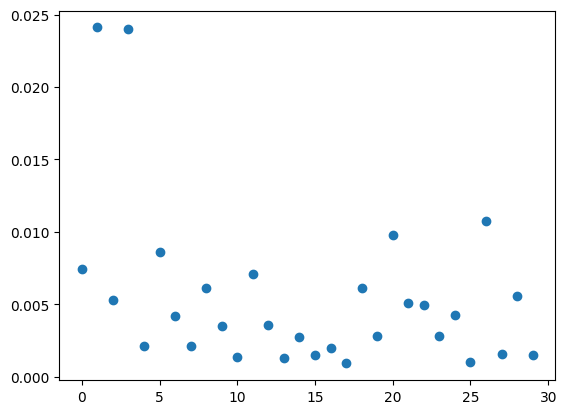

In [44]:
import matplotlib.pyplot as plt
indices = list(range(1, len(listMedians), 8))
direction1medians = []
for i in range(len(indices)):
    direction1medians.append(listMedians[indices[i]])
plt.figure()
plt.scatter(range(len(direction1medians)), direction1medians)


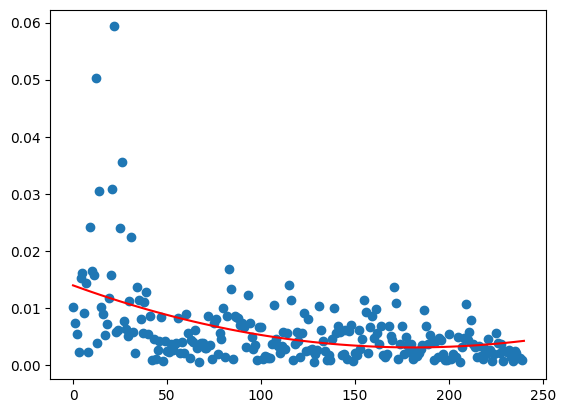

In [45]:
plt.figure()
plt.scatter(range(len(listMedians)), listMedians)
#model1 = np.poly1d(np.polyfit(range(len(listMedians)), listMedians, 1))
model2 = np.poly1d(np.polyfit(range(len(listMedians)), listMedians, 2))
#model3 = np.poly1d(np.polyfit(range(len(listMedians)), listMedians, 3))
#model4 = np.poly1d(np.polyfit(range(len(listMedians)), listMedians, 4))
polyline = np.linspace(0, len(listMedians), 50)
#plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
#plt.plot(polyline, model3(polyline), color='orange')
#plt.plot(polyline, model4(polyline), color='yellow')

In [7]:
import matplotlib.pyplot as plt
target_xy = targetsNF1
xy = resultsNF1 
target_x = target_xy[:, -1, 0]
target_y = target_xy[:, -1, 1]
nmov,ntime,_ = np.shape(xy)
print(range(nmov))



range(0, 240)


In [44]:
print(nmov)

240


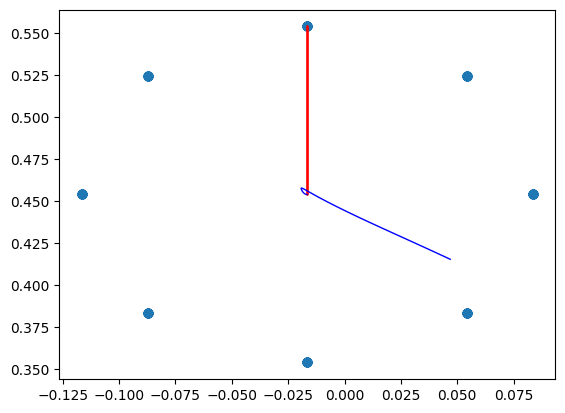

In [8]:
numPerSection = int(nmov/4)

direction = 2

#1
plt.figure()
for i in range(direction, numPerSection, 8):
    plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)

#range(4, len(listMedians), 8)
for i in range(direction, 9, 8):
    plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

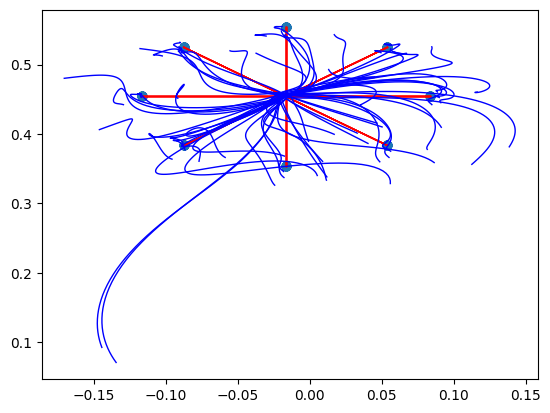

In [9]:
numPerSection = int(nmov/4)

#1
plt.figure()
for i in range(numPerSection):
    plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=1.0)


#range(4, len(listMedians), 8)
for i in range(numPerSection):
    plt.plot(xy[i,:,0],xy[i,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

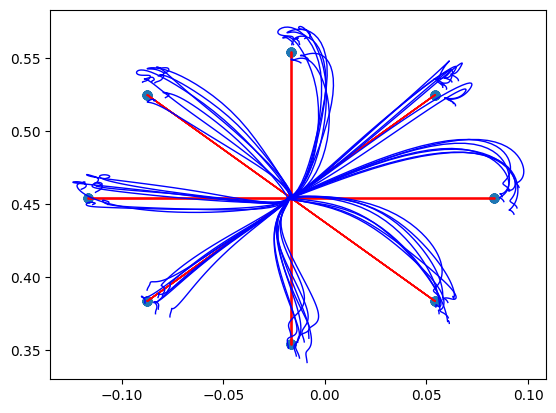

In [10]:
#2
plt.figure()
for i in range(numPerSection):
    plt.plot(target_xy[i+numPerSection,:,0],target_xy[i+numPerSection,:,1],color="r",linewidth=1.0)

for i in range(numPerSection):
    plt.plot(xy[i+numPerSection,:,0],xy[i+numPerSection,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

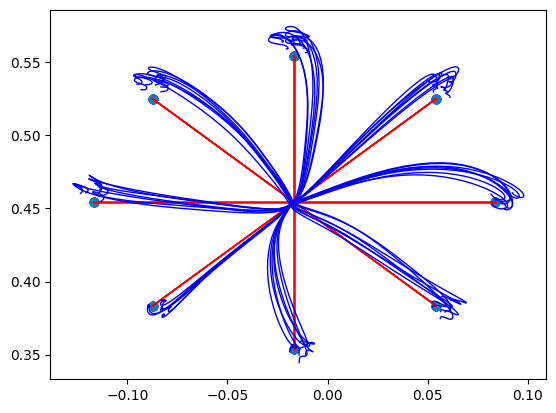

In [11]:
#3
plt.figure()
for i in range(numPerSection):
    plt.plot(target_xy[i+2*numPerSection,:,0],target_xy[i+2*numPerSection,:,1],color="r",linewidth=1.0)

for i in range(numPerSection):
    plt.plot(xy[i+2*numPerSection,:,0],xy[i+2*numPerSection,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

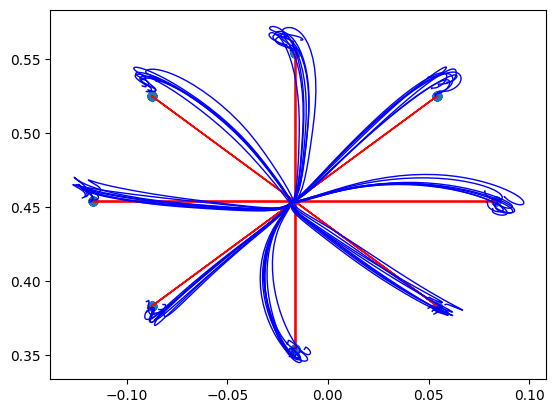

In [12]:
#4
plt.figure()
for i in range(numPerSection):
    plt.plot(target_xy[i+3*numPerSection,:,0],target_xy[i+3*numPerSection,:,1],color="r",linewidth=1.0)

for i in range(numPerSection):
    plt.plot(xy[i+3*numPerSection,:,0],xy[i+3*numPerSection,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)

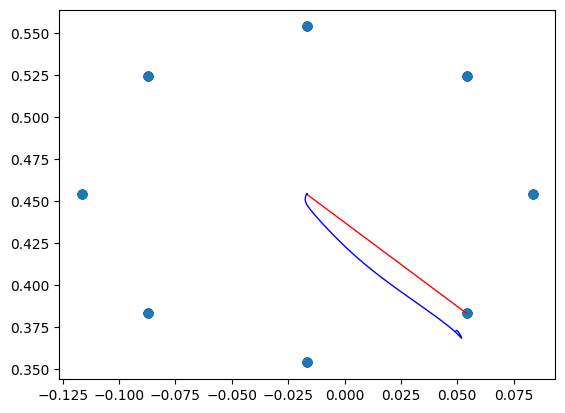

In [40]:
#final
plt.figure()
plt.plot(target_xy[-1,:,0],target_xy[-1,:,1],color="r",linewidth=1.0)

plt.plot(xy[-1,:,0],xy[-1,:,1],color="b",linewidth=1.0)
plt.scatter(target_x, target_y)